#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Подключим-необходимые-библиотеки." data-toc-modified-id="Подключим-необходимые-библиотеки.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключим необходимые библиотеки.</a></span></li><li><span><a href="#Откроем-таблицу,-посмотрим-внешний-вид-и-изучим-общую-информацию-о-данных." data-toc-modified-id="Откроем-таблицу,-посмотрим-внешний-вид-и-изучим-общую-информацию-о-данных.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Откроем таблицу, посмотрим внешний вид и изучим общую информацию о данных.</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><strong>Вывод:</strong></a></span></li><li><span><a href="#Теперь-посмотрим-на-возможные-аномалии-в-данных" data-toc-modified-id="Теперь-посмотрим-на-возможные-аномалии-в-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Теперь посмотрим на возможные аномалии в данных</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-построения-гистограммы-и-график-«ящик-с-усами»-+-describe" data-toc-modified-id="Напишем-функцию-построения-гистограммы-и-график-«ящик-с-усами»-+-describe-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Напишем функцию построения гистограммы и график «ящик с усами» + describe</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><strong>Вывод:</strong></a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Визуальный-анализ-временного-ряда" data-toc-modified-id="Визуальный-анализ-временного-ряда-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуальный анализ временного ряда</a></span></li><li><span><a href="#Статистические-тесты-на-стационарность-ряда." data-toc-modified-id="Статистические-тесты-на-стационарность-ряда.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Статистические тесты на стационарность ряда.</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><strong>Вывод:</strong></a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создадим-признаки-для-обучения-с-помощью-функции-которая-добавляет-столбцы-с-днями-недели-и-часами,-а-также-столбцы-с-разностью-последовательности-значений-и-среднего-по-окну-с-удалением-первых-сток-содержащих-NaN." data-toc-modified-id="Создадим-признаки-для-обучения-с-помощью-функции-которая-добавляет-столбцы-с-днями-недели-и-часами,-а-также-столбцы-с-разностью-последовательности-значений-и-среднего-по-окну-с-удалением-первых-сток-содержащих-NaN.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создадим признаки для обучения с помощью функции которая добавляет столбцы с днями недели и часами, а также столбцы с разностью последовательности значений и среднего по окну с удалением первых сток содержащих NaN.</a></span></li><li><span><a href="#Напишем-функцию-разделения-данных-на-обучающую-и-тестовую-выборки-в-соотношении-1:9." data-toc-modified-id="Напишем-функцию-разделения-данных-на-обучающую-и-тестовую-выборки-в-соотношении-1:9.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Напишем функцию разделения данных на обучающую и тестовую выборки в соотношении 1:9.</a></span></li><li><span><a href="#Напишем-функцию-нахождения-значения-метрики-RMSE" data-toc-modified-id="Напишем-функцию-нахождения-значения-метрики-RMSE-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Напишем функцию нахождения значения метрики RMSE</a></span></li><li><span><a href="#Напишем-функцию-подбора-гиперпераметров-для-модели-методом-GridSearch-с-кросс-валидацией-(cv=3)-по-обучающей-выборке,-с-обращением-к-функции-подбора-оптимального-количества-признаков-и-фиксацией-времени-обучения-и-предсказания." data-toc-modified-id="Напишем-функцию-подбора-гиперпераметров-для-модели-методом-GridSearch-с-кросс-валидацией-(cv=3)-по-обучающей-выборке,-с-обращением-к-функции-подбора-оптимального-количества-признаков-и-фиксацией-времени-обучения-и-предсказания.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Напишем функцию подбора гиперпераметров для модели методом GridSearch с кросс-валидацией (cv=3) по обучающей выборке, с обращением к функции подбора оптимального количества признаков и фиксацией времени обучения и предсказания.</a></span><ul class="toc-item"><li><span><a href="#Модель-DecisionTreeRegressor" data-toc-modified-id="Модель-DecisionTreeRegressor-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Модель DecisionTreeRegressor</a></span></li><li><span><a href="#Модель-RandomForestRegressor" data-toc-modified-id="Модель-RandomForestRegressor-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Модель RandomForestRegressor</a></span></li><li><span><a href="#Модель-CatBoostRegressor" data-toc-modified-id="Модель-CatBoostRegressor-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Модель CatBoostRegressor</a></span></li><li><span><a href="#Модель-LightGBMRegressor" data-toc-modified-id="Модель-LightGBMRegressor-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Модель LightGBMRegressor</a></span></li><li><span><a href="#Константная-модель-(проверка-на-адекватность)" data-toc-modified-id="Константная-модель-(проверка-на-адекватность)-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Константная модель (проверка на адекватность)</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span><strong>Вывод:</strong></a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#После-проведенного-исследования-разных-моделей-обучения-была-выбрана-модель-RandomForestRegressor-с-подобранными-гиперпараметрами-для-финальной-проверки-на-тестовых-данных.-Найдем-предсказания-и-метрику-RMSE-на-тестовой-выборке." data-toc-modified-id="После-проведенного-исследования-разных-моделей-обучения-была-выбрана-модель-RandomForestRegressor-с-подобранными-гиперпараметрами-для-финальной-проверки-на-тестовых-данных.-Найдем-предсказания-и-метрику-RMSE-на-тестовой-выборке.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>После проведенного исследования разных моделей обучения была выбрана модель RandomForestRegressor с подобранными гиперпараметрами для финальной проверки на тестовых данных. Найдем предсказания и метрику RMSE на тестовой выборке.</a></span></li><li><span><a href="#Напишем-функцию-построения-графиков-фактических-значений-и-предсказанных-значений-за-n-дней" data-toc-modified-id="Напишем-функцию-построения-графиков-фактических-значений-и-предсказанных-значений-за-n-дней-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Напишем функцию построения графиков фактических значений и предсказанных значений за n дней</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span><strong>Вывод:</strong></a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><strong>Общий вывод</strong></a></span></li></ul></li></ul></div>

## Подготовка

### Подключим необходимые библиотеки.

In [33]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

import timeit
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.iolib.table import SimpleTable
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm

from datetime import datetime, date, time

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

### Откроем таблицу, посмотрим внешний вид и изучим общую информацию о данных.

In [34]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
display(df.head())
df.info()
print()
print('Количество строк:', df.shape[0])
print()
print('Общее количество ячеек с пропусками в df:', df.isna().sum().sum())

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB

Количество строк: 26496

Общее количество ячеек с пропусками в df: 0


Отсортируем датафрейм по индексу, чтоб время шло в хронологическом порядке.

In [35]:
df.sort_index(inplace=True)
print(df.index.is_monotonic)

True


Т. к. в задании необходимо спрогнозировать количество заказов такси на следующий час, то сразу проведем ресемплинг с интервала 10 минут на интервал 1 час с агрегацией значений суммой.

In [36]:
df = df.resample('1H').sum()
display(df.head())
df.info()
print()
print('Количество строк:', df.shape[0])

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB

Количество строк: 4416


### **Вывод:**
* Загрузили и посмотрели внешний вид и изучили общую информацию о данных при этом:
  * Изменили тип данных Datetime с object на datetime64 и установили индекс таблицы равным столбцу Datetime.
* Провели сортировку по индексу и ресемплирование по часу с агрегацией по сумме. 
* Данные не нуждаются в подготовке.
* Но все же посмотрим на возможные аномалии

### Теперь посмотрим на возможные аномалии в данных

#### Напишем функцию построения гистограммы и график «ящик с усами» + describe

In [37]:
def form_fun(col, bins, rang=None):
    t = 'Гистограмма столбца ' + col
    b = 'boxplot столбца ' + col
    fig, axes = plt.subplots(1,2,figsize=(17,5))

    df[col].hist(bins=bins, ax=axes[0], range=rang)
    sns.boxplot(x=df[col], ax=axes[1])  

    axes[0].set_title(t)
    axes[1].set_title(b)
    
    print(df[col].describe())

    plt.show()

count    4416.000000
mean       84.422781
std        45.023853
min         0.000000
25%        54.000000
50%        78.000000
75%       107.000000
max       462.000000
Name: num_orders, dtype: float64


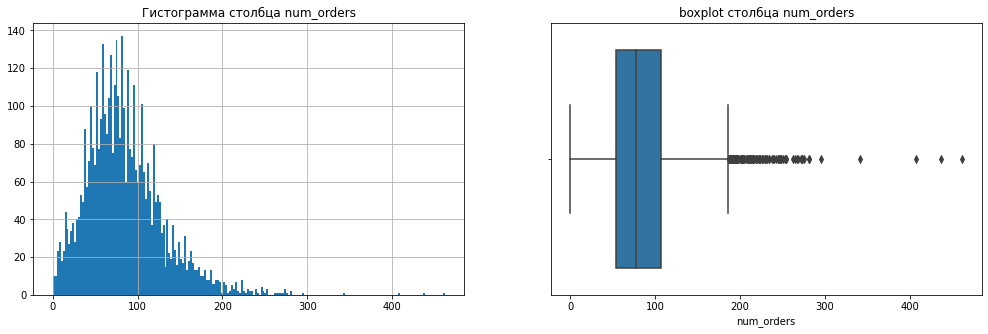

In [38]:
form_fun('num_orders', 200,)

In [39]:
print(df['num_orders'].sort_values(ascending=False))
print(df.index.sort_values(ascending=False))

datetime
2018-08-20 02:00:00    462
2018-08-13 02:00:00    437
2018-08-27 02:00:00    408
2018-08-30 17:00:00    342
2018-08-27 04:00:00    295
                      ... 
2018-05-17 06:00:00      2
2018-03-09 05:00:00      1
2018-04-03 06:00:00      1
2018-04-05 06:00:00      1
2018-04-06 06:00:00      0
Name: num_orders, Length: 4416, dtype: int64
DatetimeIndex(['2018-08-31 23:00:00', '2018-08-31 22:00:00',
               '2018-08-31 21:00:00', '2018-08-31 20:00:00',
               '2018-08-31 19:00:00', '2018-08-31 18:00:00',
               '2018-08-31 17:00:00', '2018-08-31 16:00:00',
               '2018-08-31 15:00:00', '2018-08-31 14:00:00',
               ...
               '2018-03-01 09:00:00', '2018-03-01 08:00:00',
               '2018-03-01 07:00:00', '2018-03-01 06:00:00',
               '2018-03-01 05:00:00', '2018-03-01 04:00:00',
               '2018-03-01 03:00:00', '2018-03-01 02:00:00',
               '2018-03-01 01:00:00', '2018-03-01 00:00:00'],
              dtype

### **Вывод:**
* Распределение нормальное.
* Минимальные (0 - 5) значения вполне реальны в под утренние часы, когда еще все люди спят и на предприятиях еще не закончились ночные смены. Максимальные (300 - 462) могут возникнуть как в ночное время по причине неработающего общественного транспорта, так и по погодным условиям (сильный дождь или снег). Аномалий нет
.

## Анализ

### Визуальный анализ временного ряда

Посмотрим на временной ряд

<AxesSubplot:xlabel='datetime'>

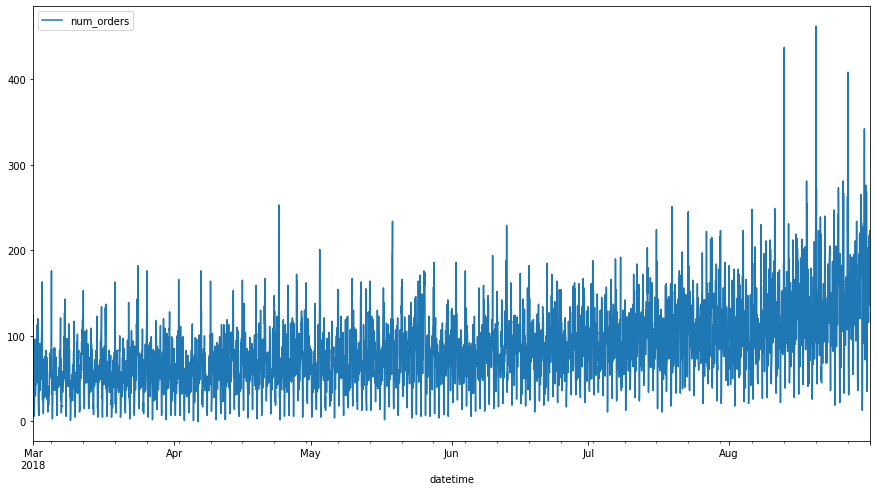

In [40]:
figsize = (15,8)
df.plot(figsize=figsize)

Посмотрим есть ли у него тренд и сезонность

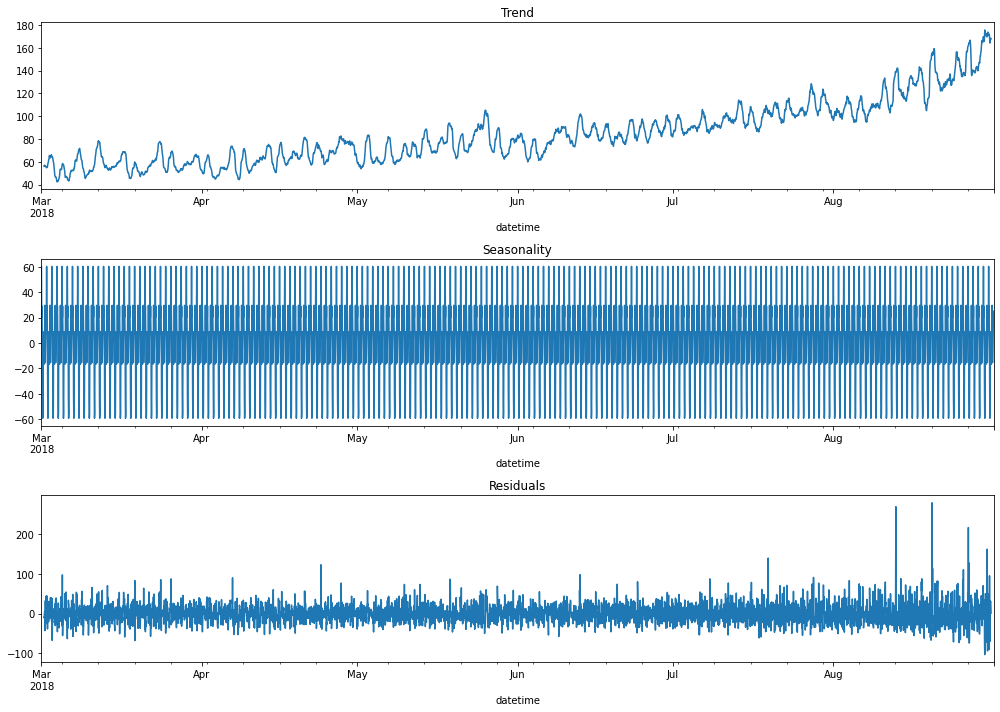

In [41]:
decomposed = seasonal_decompose(df)

plt.figure(figsize=(14, 10))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 

plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

Посмотрим, как выглядит дневная сезонность. Для этого наложим все дни друг на друга с минимальным сдвигом по оси времени.

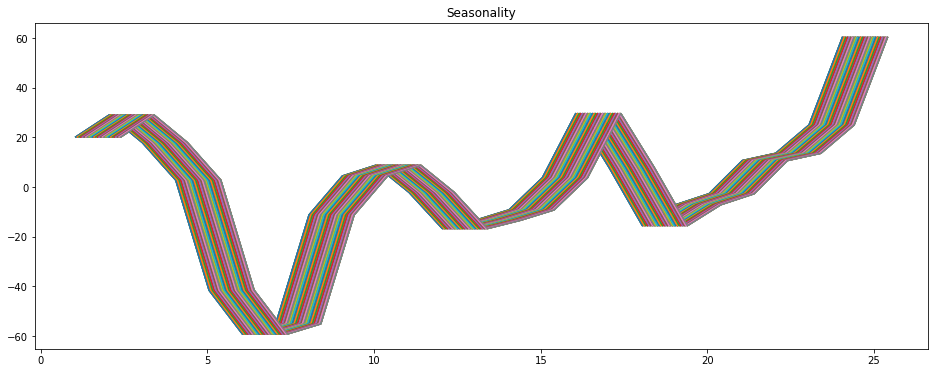

In [42]:
decomposed = seasonal_decompose(df)
plt.figure(figsize=(16, 6))
for j in range(3 ,9 ,1):
    for i in np.arange(1, 29, 1):
        k3 = datetime.strptime('2018-' + str(j) + '-' + str(i) +'T01:00:00', '%Y-%m-%dT%H:%M:%S') 
        k4 = datetime.strptime('2018-' + str(j) + '-' + str(i+1) +'T00:00:00', '%Y-%m-%dT%H:%M:%S') 
        days = decomposed.seasonal[k3:k4].values
        days = pd.Series(days, index=np.arange(1+i*0.05,25+i*0.05))
        days.plot() 
        plt.title('Seasonality')

Дневная сезонность подтверждается

Посмотрим, как обстоят дела с месячной сезонностью по дням. Для этого построим недельные графики по месяцам

In [43]:
df_days = df.resample('1D').sum()

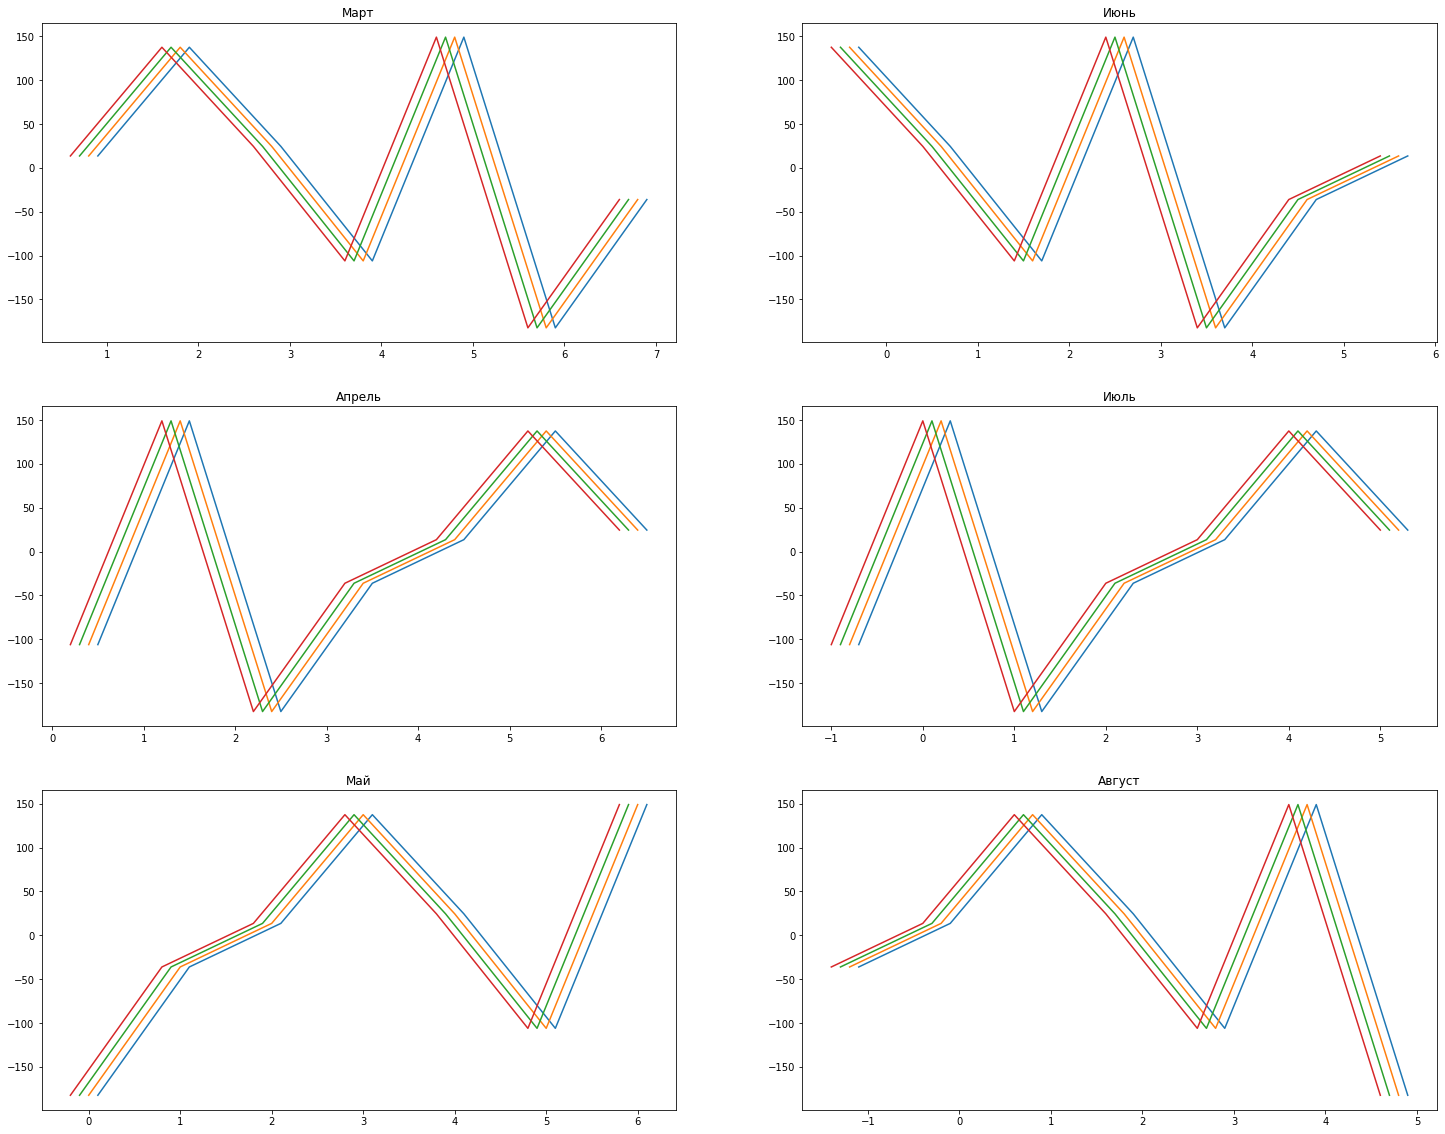

In [44]:

decomposed = seasonal_decompose(df_days)
fig,ax = plt.subplots(3,2,figsize = (25,20))
r = 1
j = 4
for j in np.arange(3, 9, 1):
    for i in np.arange(1, 23, 7):
        k3 = datetime.strptime('2018-' + str(j) + '-' + str(i), '%Y-%m-%d') 
        k4 = datetime.strptime('2018-' + str(j) + '-' + str(i+6), '%Y-%m-%d') 
        days = decomposed.seasonal[k3:k4].values
        days = pd.Series(days, index=np.arange(1 - (r * 0.1), 8 - (r * 0.1)))
        r += 1
        if j == 3:
            m = 0
            n = 0
            ax[m][n].set_title("Март")
        elif j == 4:
            m = 1
            n = 0
            ax[m][n].set_title("Апрель")
        elif j == 5:
            m = 2
            n = 0
            ax[m][n].set_title("Май")
        elif j == 6:
            m = 0
            n = 1 
            ax[m][n].set_title("Июнь")
        elif j == 7:
            m = 1
            n = 1 
            ax[m][n].set_title("Июль")
        elif j == 8:
            m = 2
            n = 1  
            ax[m][n].set_title("Август")

        ax[m][n].plot(days)


Если посмотреть на сезонность по месяцам с агрегацией по дню можно сказать что сезонность отсутствует, зато наблюдается сезонность недельная с привязкой по дням недели. 

Наложим месяца друг на друга для того чтоб увидеть месячную сезонность, но без учета недельной сезонности.

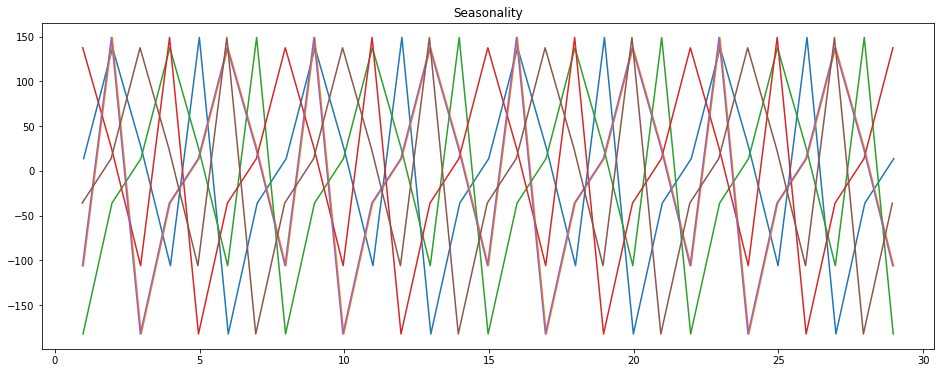

In [45]:
decomposed = seasonal_decompose(df_days)
plt.figure(figsize=(16, 6))
r = 1
for j in np.arange(3, 9, 1):
    k3 = datetime.strptime('2018-' + str(j) + '-' + str(1), '%Y-%m-%d') 
    k4 = datetime.strptime('2018-' + str(j) + '-' + str(29), '%Y-%m-%d') 
    days = decomposed.seasonal[k3:k4].values
    days = pd.Series(days, index=np.arange(1 - (r * 0.01), 30 - (r * 0.01)))
    r += 1
    days.plot() 
    plt.title('Seasonality')


Месячная сезонность с присязкой к дням месяца отсутствует.

### Статистические тесты на стационарность ряда.

Для проверки стационарности проведем обобщенный тест Дикки-Фуллера на наличие единичных корней.

In [46]:
test = sm.tsa.adfuller(df['num_orders'])
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -3.0689242890279558
p-value:  0.028940051402612906
Critical values:  {'1%': -3.431842162413052, '5%': -2.8621993540813637, '10%': -2.567120978470452}
единичных корней нет, ряд стационарен


Гипотеза о стационарности не отвергается

Тест KPSS

In [47]:
def kpss_test(series, i, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw, regression=i)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Этот ряд {"не " if p_value < 0.05 else ""}стационарен')


In [48]:
kpss_test(df['num_orders'], 'c')

KPSS Statistic: 10.913353384602186
p-value: 0.01
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Этот ряд не стационарен


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Гипотеза о стационарности на константу отвергается

In [49]:
kpss_test(df['num_orders'], 'ct')

KPSS Statistic: 1.5541377850842126
p-value: 0.01
num lags: 7
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Этот ряд не стационарен


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Гипотеза о тренд-стационарности отвергается.

### **Вывод:**
* Метод seasonal_decompose показал наличие тренда, сезонности и шума во временном ряду.
* По графикам четко видно наличие дневной с привязкой по часам и недельной сезонности с привязкой по дням недели и отсутствия месячной сезонности с привязкой по дням месяца.
* Годовую сезонность определить невозможно в связи с ограниченным в полгода временным рядом.
* Для проверки стационарности провели обобщенный тест Дикки-Фуллера на наличие единичных корней, который показал, что гипотеза о стационарности не отвергается.
* Тест KPSS опроверг гипотезу о стационарности на константу и гипотезу о тренд-стационарности.
* Разные результаты тестов возникли из-за разных подходов в тестах.
* Исходя из этого точно утверждать, что временной ряд является нестационарным нельзя, возможно он "слишком близок" к стационарному или вообще стационарный, а тесты путают тренд с какой-то цикличностью на много большем временном промежутке чем сам ряд.
* В связи с тем, что нестационарные временные ряды дают большую неточность прогнозирования необходимо привести нестационарный временной ряд к стационарному. Но наш ряд если нестационарный, то близок к стационарному, поэтому проведем обучение на нем.

## Обучение

### Создадим признаки для обучения с помощью функции которая добавляет столбцы с днями недели и часами, а также столбцы с разностью последовательности значений и среднего по окну с удалением первых сток содержащих NaN.

В качестве признаков добавим часовой и недельный т. к. содержат информацию о сезонности. 

In [50]:
def make_features(data, max_lag, rolling_mean_size):
    

    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    data = data.dropna()
    
    return data


### Напишем функцию разделения данных на обучающую и тестовую выборки в соотношении 1:9.

In [51]:
def split(data):
    
    features = data.drop(['num_orders'], axis=1)
    target = data['num_orders']

    features_train, features_test, target_train, target_test = train_test_split(
                            features, target, shuffle=False, test_size=0.1)
    
        
    return (features_train, features_test, target_train, target_test)

### Напишем функцию нахождения значения метрики RMSE 

In [52]:
def RMSE_fun(target, predictions):
    result = mean_squared_error(target, predictions) ** 0.5
    return result

### Напишем функцию подбора гиперпераметров для модели методом GridSearch с кросс-валидацией (cv=3) по обучающей выборке, с обращением к функции подбора оптимального количества признаков и фиксацией времени обучения и предсказания.

In [53]:
def search_best_parameters(model, param, lag, rolling):
    report = pd.DataFrame(columns=['RMSE на обучающей выборке'
                                   , 'Время обучения'
                                   , 'Время предсказания'
                                   , 'max_lag'
                                   , 'rolling_mean_size'
                                   , 'Лучшие гиперпараметры'])
    
    best_result_train = 10**5
    best_max_lag = 0
    best_rolling_mean_size = None
    best_params = None
    best_elapsed_first = None
    best_elapsed_second = None
    best_model = None
    
    

    
    
    i = -1
    for max_lag in np.arange(lag[0], lag[1], lag[2]):
        for roll in np.arange(rolling[0], rolling[1], rolling[2]):
            i += 1           
            data = make_features(df, max_lag, roll)            
            features_train, features_test, target_train, target_test = split(data)
            
            tscv = TimeSeriesSplit(n_splits = 11)
            
            start_time = timeit.default_timer()
            search = GridSearchCV(model, param_grid = param, cv=tscv, verbose=1
                            , scoring='neg_mean_squared_error'
                            , n_jobs=-1)
            
            start_time = timeit.default_timer()
                   
            warnings.filterwarnings("ignore", category=FutureWarning)
            search.fit(features_train, target_train)
            
            elapsed_first = round(timeit.default_timer() - start_time, 3)
            
            predict_train = search.predict(features_train)
            result_train = round(RMSE_fun(target_train, predict_train), 1)
            
            start_time = timeit.default_timer()
            elapsed_second = round(timeit.default_timer() - start_time, 3)
            
            report.loc[i, 'RMSE на обучающей выборке'] = result_train
            report.loc[i, 'Время обучения'] = elapsed_first          
            report.loc[i, 'Время предсказания'] = elapsed_second
            report.loc[i, 'max_lag'] = max_lag           
            report.loc[i, 'rolling_mean_size'] = roll        
            report.loc[i, 'Лучшие гиперпараметры'] = str(search.best_params_)
            
            
            if result_train < best_result_train:
                best_result_train = result_train
                best_max_lag = max_lag
                best_rolling_mean_size = roll
                best_params = search.best_params_
                best_elapsed_first = elapsed_first
                best_elapsed_second = elapsed_second
                best_model = search
                
    report = report.sort_values(by='RMSE на обучающей выборке').head().reset_index(drop=True)
    return (best_result_train, best_max_lag
            , best_rolling_mean_size
            , best_params
            , best_elapsed_first
            , best_elapsed_second
            , report
            , best_model)

#### Модель DecisionTreeRegressor 

In [54]:
decision_tree = DecisionTreeRegressor(random_state=2)
param = {'max_depth':range (1,10)}
lag = [12, 15, 1]
rolling = [9, 12, 1]
(best_result_train
        , best_max_lag
        , best_rolling_mean_size
        , best_params
        , best_elapsed_first
        , best_elapsed_second
        , report
        , best_model_tree_regressor) = search_best_parameters(decision_tree, param, lag, rolling)
display(report)
oll_best_model = report.head(1)

Fitting 11 folds for each of 9 candidates, totalling 99 fits
Fitting 11 folds for each of 9 candidates, totalling 99 fits
Fitting 11 folds for each of 9 candidates, totalling 99 fits
Fitting 11 folds for each of 9 candidates, totalling 99 fits
Fitting 11 folds for each of 9 candidates, totalling 99 fits
Fitting 11 folds for each of 9 candidates, totalling 99 fits
Fitting 11 folds for each of 9 candidates, totalling 99 fits
Fitting 11 folds for each of 9 candidates, totalling 99 fits
Fitting 11 folds for each of 9 candidates, totalling 99 fits


,RMSE на обучающей выборке,Время обучения,Время предсказания,max_lag,rolling_mean_size,Лучшие гиперпараметры
0,19.9,1.241,0.0,12,10,{'max_depth': 8}
1,19.9,1.298,0.0,13,10,{'max_depth': 8}
2,19.9,1.305,0.0,14,10,{'max_depth': 8}
3,21.4,1.245,0.0,12,9,{'max_depth': 8}
4,21.5,1.286,0.0,13,9,{'max_depth': 8}


#### Модель RandomForestRegressor 

In [55]:
random_forest = RandomForestRegressor(random_state=2)
param = {'n_estimators':range(120, 150, 30),'max_depth':range (15,17)}
lag = [35, 38, 1]
rolling = [14, 16, 1]
(best_result_train
        , best_max_lag
        , best_rolling_mean_size
        , best_params
        , best_elapsed_first
        , best_elapsed_second
        , report
        , best_model_fores_regressor) = search_best_parameters(random_forest, param, lag, rolling)
display(report)
oll_best_model = oll_best_model.append(report.head(1))

Fitting 11 folds for each of 2 candidates, totalling 22 fits
Fitting 11 folds for each of 2 candidates, totalling 22 fits
Fitting 11 folds for each of 2 candidates, totalling 22 fits
Fitting 11 folds for each of 2 candidates, totalling 22 fits
Fitting 11 folds for each of 2 candidates, totalling 22 fits
Fitting 11 folds for each of 2 candidates, totalling 22 fits


,RMSE на обучающей выборке,Время обучения,Время предсказания,max_lag,rolling_mean_size,Лучшие гиперпараметры
0,9.0,94.163,0.0,35,14,"{'max_depth': 16, 'n_estimators': 120}"
1,9.0,93.756,0.0,35,15,"{'max_depth': 16, 'n_estimators': 120}"
2,9.0,96.67,0.0,37,14,"{'max_depth': 16, 'n_estimators': 120}"
3,9.1,94.737,0.0,36,14,"{'max_depth': 16, 'n_estimators': 120}"
4,9.1,96.689,0.0,37,15,"{'max_depth': 16, 'n_estimators': 120}"


#### Модель CatBoostRegressor

In [56]:
catboost = CatBoostRegressor(random_state=42, silent=True)
param = {'n_estimators': [80,90,100], 'learning_rate': [0.1]}
lag = [20, 40, 5]
rolling = [10, 25, 5]
(best_result_train
        , best_max_lag
        , best_rolling_mean_size
        , best_params
        , best_elapsed_first
        , best_elapsed_second
        , report
        , best_model_catboost_regressor) = search_best_parameters(catboost, param, lag, rolling)
display(report)
oll_best_model = oll_best_model.append(report.head(1))

Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits
Fitting 11 folds for each of 3 candidates, totalling 33 fits


,RMSE на обучающей выборке,Время обучения,Время предсказания,max_lag,rolling_mean_size,Лучшие гиперпараметры
0,19.7,37.149,0.0,20,10,"{'learning_rate': 0.1, 'n_estimators': 100}"
1,19.7,35.899,0.0,20,15,"{'learning_rate': 0.1, 'n_estimators': 100}"
2,19.7,36.668,0.0,25,10,"{'learning_rate': 0.1, 'n_estimators': 100}"
3,19.7,36.424,0.0,25,15,"{'learning_rate': 0.1, 'n_estimators': 100}"
4,19.7,38.109,0.0,30,10,"{'learning_rate': 0.1, 'n_estimators': 100}"


#### Модель LightGBMRegressor

In [57]:
light_gbm = LGBMRegressor(random_state=2)
param = {'n_estimators': [80, 90, 100], 'max_depth': [4,12], 'learning_rate': [0.1]}
lag = [43, 46, 2]
rolling = [16, 18, 1]
(best_result_train
        , best_max_lag
        , best_rolling_mean_size
        , best_params
        , best_elapsed_first
        , best_elapsed_second
        , report
        , best_model_light_gbm_regressor) = search_best_parameters(light_gbm, param, lag, rolling)
display(report)
oll_best_model = oll_best_model.append(report.head(1))

Fitting 11 folds for each of 6 candidates, totalling 66 fits
Fitting 11 folds for each of 6 candidates, totalling 66 fits
Fitting 11 folds for each of 6 candidates, totalling 66 fits
Fitting 11 folds for each of 6 candidates, totalling 66 fits


,RMSE на обучающей выборке,Время обучения,Время предсказания,max_lag,rolling_mean_size,Лучшие гиперпараметры
0,11.2,60.181,0.0,43,17,"{'learning_rate': 0.1, 'max_depth': 12, 'n_est..."
1,11.2,71.688,0.0,45,16,"{'learning_rate': 0.1, 'max_depth': 12, 'n_est..."
2,11.3,58.483,0.0,43,16,"{'learning_rate': 0.1, 'max_depth': 12, 'n_est..."
3,12.5,136.483,0.0,45,17,"{'learning_rate': 0.1, 'max_depth': 12, 'n_est..."


#### Константная модель (проверка на адекватность)

In [58]:
start_time = timeit.default_timer()
features_train, features_test, target_train, target_test = split(df)
predictions_mean = pd.Series([target_train.mean() for i in range(len(target_test))])
elapsed_first = round(timeit.default_timer() - start_time, 3)
start_time = timeit.default_timer()
result = round(RMSE_fun(target_test, predictions_mean), 0)
elapsed_second = round(timeit.default_timer() - start_time, 3)
print('Время обучения:', elapsed_first)
print('Время предсказания:', elapsed_second)
print('RMSE:', result)

Время обучения: 0.027
Время предсказания: 0.001
RMSE: 85.0


Большое значение RMSE: 85 говорит об адекватности предыдущих моделей обучения.

Посмотрим вместе все результаты обучения с лучшими параметрами и гиперпараметрами.

In [59]:
oll_best_model.index = pd.Series(['DecisionTreeRegressor', 'RandomForestRegressor', 'CatBoostRegressor', 'LightGBMRegressor'])
display(oll_best_model)

,RMSE на обучающей выборке,Время обучения,Время предсказания,max_lag,rolling_mean_size,Лучшие гиперпараметры
DecisionTreeRegressor,19.9,1.241,0.0,12,10,{'max_depth': 8}
RandomForestRegressor,9.0,94.163,0.0,35,14,"{'max_depth': 16, 'n_estimators': 120}"
CatBoostRegressor,19.7,37.149,0.0,20,10,"{'learning_rate': 0.1, 'n_estimators': 100}"
LightGBMRegressor,11.2,60.181,0.0,43,17,"{'learning_rate': 0.1, 'max_depth': 12, 'n_est..."


### **Вывод:**
* Написали функции для создадим признаков для обучения которая добавляет столбцы с днями недели и часами, а также столбцы с разностью последовательности значений и среднего по окну с удалением первых сток содержащих NaN
* Написали функцию нахождения значения метрики RMSE
* Написали функцию подбора гиперпераметров для модели методом GridSearch с кросс-валидацией (cv=3) по обучающей выборке, с обращением к функции подбора оптимального количества признаков и фиксацией времени обучения и предсказания.
* Обучили модели 'DecisionTreeRegressor', 'RandomForestRegressor', 'CatBoostRegressor', 'LightGBMRegressor'. 
* Лучшее значение RMSE = 9 на обучающей выборке показала модель RandomForestRegressor, но при этом самое большее время обучения.
* Недалеко позади со значением RMSE = 11.3	на обучающей выборке показала модель LightGBMRegressor, но при этом время обучения в два раза быстрее чем RandomForestRegressor.
* Худшие значения RMSE на обучающей выборке показали модели DecisionTreeRegressor и CatBoostRegressor
* Для дальнего тестирования выбираем модель RandomForestRegressor по причине лучшего RMSE на обучающей выборке. В том случае если скорость обучения имеет большое значения можно выбрать модель LightGBMRegressor. 

## Тестирование

### После проведенного исследования разных моделей обучения была выбрана модель RandomForestRegressor с подобранными гиперпараметрами для финальной проверки на тестовых данных. Найдем предсказания и метрику RMSE на тестовой выборке.

In [60]:
df = make_features(df, 35, 14)
features_train, features_test, target_train, target_test = split(df)

random_forest.fit(features_train, target_train)

test_predictions = random_forest.predict(features_test)
result_test = round(RMSE_fun(target_test, test_predictions), 1)
predictions = pd.Series(test_predictions, target_test.index)
print('RMSE на тестовой выборке:', result_test)

RMSE на тестовой выборке: 42.8


### Напишем функцию построения графиков фактических значений и предсказанных значений за n дней

In [61]:
def draw_fun(i):
    if i != 0:
        try:
            ax = plt.gca()
            
            k3 = datetime.strptime('2018-08' + '-' + str(13) +'T18:00:00', '%Y-%m-%dT%H:%M:%S') 
            k4 = datetime.strptime('2018-08' + '-' + str(13+i) +'T18:00:00', '%Y-%m-%dT%H:%M:%S') 
            
            days_target = target_test[k3:k4]
            days_predictions = predictions[k3:k4]
            
            days_target.plot(figsize=(17,8), color='g') 
            days_predictions.plot(figsize=(17,8), color='r')
            
            plt.xlabel("Дата и время", fontsize=15, fontweight="bold")
            plt.ylabel("Число заказов", fontsize=15, fontweight="bold")
            
            title_draw = 'Сравнение фактических значений и предсказанных значений за ' + str(i) + ' дня'
            plt.title(title_draw)
            ax.legend(['фактические значения', 'предсказанные значения'])
        except ValueError:
            print('Выбран слишком большой интервал сравнения, можно до 18 дней включительно')
        except IndexError:
            print('Выбран некорректный интервал сравнения, можно от 1 до 18 дней включительно')
    else:
        print('Ну только не ноль')

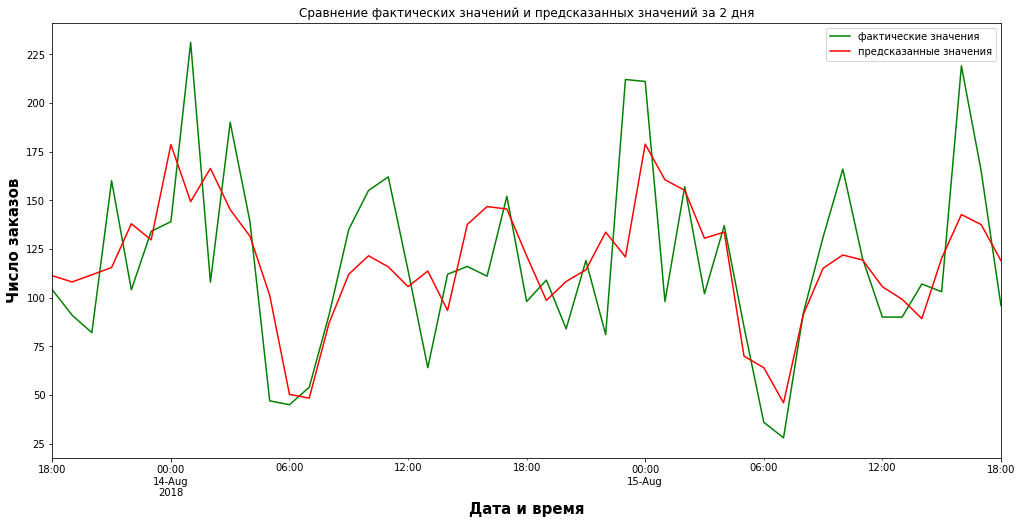

In [62]:
draw_fun(2)

#### **Вывод:**
* Значение метрики RMSE на тестовой выборке: 42.8. Значение меньше 48. Тестирование прошло успешно.
* Визуализация сравнения фактических значений и предсказанных значений показывает неплохие результаты. Модель предсказания сглаживает локальные максимумы и минимумы оставаясь в рамках сезонности.

### **Общий вывод**
* __Нами были получены исторические данные о заказах такси в аэропортах. Необходимо было исследовать временной ряд и обучить модель для предсказания количество заказов такси на следующий час.__
* __Загрузили и посмотрели внешний вид и изучили общую информацию о данных при этом:__
  * Изменили тип данных Datetime с object на datetime64 и установили индекс таблицы равным столбцу Datetime.
  * Провели сортировку по индексу и ресемплирование по часу с агрегацией по сумме. 
* __Посмотрим на возможные аномалии:__
  * Распределение нормальное.
  * Минимальные (0 - 5) значения вполне реальны в под утренние часы, когда еще все люди спят и на предприятиях еще не закончились ночные смены. 
  * Максимальные (300 - 462) могут возникнуть как в ночное время по причине неработающего общественного транспорта, так и по погодным условиям (сильный дождь или снег). 
  * Аномалий нет.
* __Исследовали временной ряд:__
  * Метод seasonal_decompose показал наличие тренда, сезонности и шума во временном ряду.
  * По графикам четко видно наличие дневной с привязкой по часам и недельной сезонности с привязкой по дням недели и отсутствия месячной сезонности с привязкой по дням месяца.
  * Годовую сезонность определить невозможно в связи с ограниченным в полгода временным рядом.
  * Для проверки стационарности провели обобщенный тест Дикки-Фуллера на наличие единичных корней, который показал, что гипотеза о стационарности не отвергается.
  * Тест KPSS опроверг гипотезу о стационарности на константу и гипотезу о тренд-стационарности.
  * Разные результаты тестов возникли из-за разных подходов в тестах.
  * Исходя из этого точно утверждать что временной ряд является нестационарным нельзя, возможно он "слишком близок" к стационарному или вообще стационарный, а тесты путают тренд с какой-то цикличностью на  много большем временном промежутке чем сам ряд.
  * В связи с тем, что нестационарные временные ряды дают большую неточность прогнозирования необходимо привести нестационарный временной ряд к стационарному. Но наш ряд если нестационарный, то близок к стационарному, поэтому проведем обучение на нем.
* __Обучили модель, для этого:__
  * Написали функции для создадим признаков для обучения которая добавляет столбцы с днями недели и часами, а также столбцы с разностью последовательности значений и среднего по окну с удалением первых сток содержащих NaN
  * Написали функцию нахождения значения метрики RMSE
  * Написали функцию подбора гиперпераметров для модели методом GridSearch с кросс-валидацией (cv=4) по обучающей выборке, с обращением к функции подбора оптимального количества признаков и фиксацией времени обучения и предсказания.
  * Обучили модели 'DecisionTreeRegressor', 'RandomForestRegressor', 'CatBoostRegressor', 'LightGBMRegressor'. 
  * Лучшее значение RMSE = 9 на обучающей выборке показала модель RandomForestRegressor, но при этом самое большее время обучения.
  * Недалеко позади со значением RMSE = 11.3	на обучающей выборке показала модель LightGBMRegressor, но при этом время обучения в два раза быстрее чем RandomForestRegressor.
  * Худшие значения RMSE на обучающей выборке показали модели DecisionTreeRegressor и CatBoostRegressor
  * Для дальнего тестирования выбираем модель RandomForestRegressor по причине лучшего RMSE на обучающей выборке. В том случае если скорость обучения имеет большое значения можно выбрать модель LightGBMRegressor. 
* __Значение метрики RMSE на тестовой выборке: 42.8. Значение меньше 48. Тестирование прошло успешно.__
* __Визуализация сравнения фактических значений и предсказанных значений показывает неплохие результаты. Модель предсказания сглаживает локальные максимумы и минимумы оставаясь в рамках сезонности.__
* __Модель можно рекомндовать для предсказания количество заказов такси на следующий час.__